## Importing the Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
from sklearn.metrics import roc_curve, auc
from scipy.stats import zscore

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

## Importing the dataset

In [3]:
dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Final project/Dataset/train and test data.csv")
dataset

,id,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,...,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
0,23334,saving,M,63,305,7695.00,NaN,479.00,NaN,622.00,...,2.0,45000.0,20215.85,1279.37,7.0,3.0,470.0,NaN,0.00,435
1,20329,current,M,33,326,52702.00,988.72,29873.00,NaN,1087.00,...,10.0,150000.0,122037.66,55390.00,8.0,19.0,27000.0,NaN,4963.33,1921
2,17679,current,M,44,264,10800.49,3215.52,21660.00,1607.0,1168.00,...,7.0,13800.0,46827.00,29297.91,6.0,19.0,20800.0,NaN,0.00,1970
3,16428,saving,M,44,233,20936.00,NaN,2094.00,NaN,11778.50,...,1.0,19300.0,5426.55,7544.00,3.0,1.0,5300.0,NaN,1238.18,21579
4,18721,saving,F,35,324,1183.83,NaN,3656.29,NaN,945.00,...,3.0,3000.0,26178.05,53483.00,4.0,4.0,45000.0,NaN,0.00,1814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32815,43723,saving,M,43,583,45275.20,NaN,48901.62,NaN,47267.41,...,5.0,46500.0,45065.00,57403.00,4.0,9.0,48000.0,NaN,11192.56,3691
32816,32511,current,M,33,623,1627.00,NaN,3494.54,1393.0,3242.00,...,9.0,136503.0,124930.00,17209.93,3.0,20.0,16403.0,NaN,3702.50,4275
32817,5192,current,M,25,245,22409.00,2538.00,41241.00,639.0,2087.00,...,2.0,16923.0,34993.98,25289.98,6.0,20.0,16870.0,NaN,0.00,1677
32818,12172,current,M,33,535,9877.30,373.00,9018.22,NaN,2804.00,...,4.0,6500.0,44352.21,44302.36,9.0,6.0,19087.0,NaN,1716.37,846


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32820 entries, 0 to 32819
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     32820 non-null  int64  
 1   account_type           32820 non-null  object 
 2   gender                 32820 non-null  object 
 3   age                    32820 non-null  int64  
 4   region_code            32820 non-null  int64  
 5   cc_cons_apr            32820 non-null  float64
 6   dc_cons_apr            13768 non-null  float64
 7   cc_cons_may            32820 non-null  float64
 8   dc_cons_may            15481 non-null  float64
 9   cc_cons_jun            32820 non-null  float64
 10  dc_cons_jun            11523 non-null  float64
 11  cc_count_apr           30421 non-null  float64
 12  cc_count_may           31667 non-null  float64
 13  cc_count_jun           31230 non-null  float64
 14  dc_count_apr           13768 non-null  float64
 15  dc

In [5]:
dataset.describe()

,id,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons
count,32820.000000,32820.000000,32820.000000,32820.000000,13768.000000,3.282000e+04,15481.000000,32820.000000,11523.000000,30421.000000,...,30749.000000,30749.000000,2.941500e+04,3.062500e+04,3.127700e+04,31292.000000,31292.000000,3.127700e+04,3.282000e+04,32820.000000
mean,23450.929616,35.951676,554.854327,16661.907189,5727.615837,1.441190e+04,5635.506904,9031.179889,4666.713420,9.162191,...,4.087352,13.934795,4.969688e+04,7.759673e+04,7.583531e+04,5.767736,16.001438,4.474355e+04,9.567620e+03,6824.631840
std,13495.676061,8.529949,188.220317,25138.435416,11544.058014,2.363688e+04,14052.343253,15720.847307,10265.189742,10.790714,...,3.847766,11.455178,1.287256e+05,3.140103e+05,3.062791e+05,4.704716,13.370195,1.215379e+05,2.616736e+05,12459.140593
min,0.000000,22.000000,123.000000,233.970000,10.010000,1.030000e+02,20.000000,51.000000,23.000000,1.000000,...,0.000000,0.000000,1.500000e-01,5.230000e+00,1.188000e+01,0.000000,0.000000,6.000000e-02,0.000000e+00,0.000000
25%,11824.750000,31.000000,425.000000,3712.000000,849.000000,2.983298e+03,796.000000,1637.875000,743.000000,3.000000,...,2.000000,6.000000,1.817300e+04,2.509642e+04,2.306400e+04,3.000000,6.000000,1.600000e+04,0.000000e+00,1285.000000
50%,23478.500000,34.000000,575.000000,8912.790000,2282.160000,7.332298e+03,2129.000000,4147.487500,1832.000000,7.000000,...,3.000000,11.000000,3.000000e+04,4.593499e+04,4.295500e+04,5.000000,13.000000,2.687600e+04,1.510650e+02,3141.000000
75%,35096.250000,39.000000,683.000000,19932.060000,6074.600000,1.684785e+04,5640.000000,10126.250000,4607.500000,12.000000,...,5.000000,19.000000,5.000000e+04,8.413612e+04,8.072400e+04,7.000000,22.000000,4.701000e+04,4.176868e+03,7349.250000
max,46886.000000,224.000000,977.000000,804712.580000,366223.160000,1.117246e+06,911223.490000,382914.100000,301991.940000,1012.000000,...,71.000000,171.000000,1.285103e+07,3.986881e+07,3.933931e+07,117.000000,164.000000,1.293238e+07,4.468722e+07,408630.000000


In [6]:
dataset[dataset['cc_cons']!=0]

,id,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,...,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
0,23334,saving,M,63,305,7695.00,NaN,479.00,NaN,622.00,...,2.0,45000.0,20215.85,1279.37,7.0,3.0,470.0,NaN,0.00,435
1,20329,current,M,33,326,52702.00,988.72,29873.00,NaN,1087.00,...,10.0,150000.0,122037.66,55390.00,8.0,19.0,27000.0,NaN,4963.33,1921
2,17679,current,M,44,264,10800.49,3215.52,21660.00,1607.0,1168.00,...,7.0,13800.0,46827.00,29297.91,6.0,19.0,20800.0,NaN,0.00,1970
3,16428,saving,M,44,233,20936.00,NaN,2094.00,NaN,11778.50,...,1.0,19300.0,5426.55,7544.00,3.0,1.0,5300.0,NaN,1238.18,21579
4,18721,saving,F,35,324,1183.83,NaN,3656.29,NaN,945.00,...,3.0,3000.0,26178.05,53483.00,4.0,4.0,45000.0,NaN,0.00,1814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32815,43723,saving,M,43,583,45275.20,NaN,48901.62,NaN,47267.41,...,5.0,46500.0,45065.00,57403.00,4.0,9.0,48000.0,NaN,11192.56,3691
32816,32511,current,M,33,623,1627.00,NaN,3494.54,1393.0,3242.00,...,9.0,136503.0,124930.00,17209.93,3.0,20.0,16403.0,NaN,3702.50,4275
32817,5192,current,M,25,245,22409.00,2538.00,41241.00,639.0,2087.00,...,2.0,16923.0,34993.98,25289.98,6.0,20.0,16870.0,NaN,0.00,1677
32818,12172,current,M,33,535,9877.30,373.00,9018.22,NaN,2804.00,...,4.0,6500.0,44352.21,44302.36,9.0,6.0,19087.0,NaN,1716.37,846


In [7]:
dataset['cc_cons'].value_counts

<bound method IndexOpsMixin.value_counts of 0          435
1         1921
2         1970
3        21579
4         1814
         ...  
32815     3691
32816     4275
32817     1677
32818      846
32819      850
Name: cc_cons, Length: 32820, dtype: int64>

## Removing the outliers

<Axes: ylabel='age'>

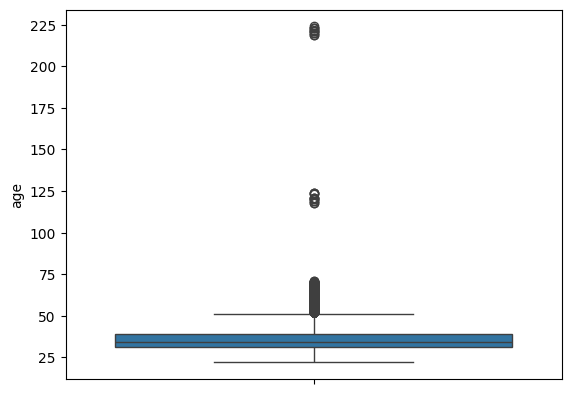

In [9]:
sns.boxplot(dataset["age"])


## Removing outliers

In [11]:
dataset['z_score_age']=(dataset['age']-dataset['age'].mean())/dataset['age'].std()

In [12]:
dataset['z_score_age']

,z_score_age
0,3.170983
1,-0.346037
2,0.943537
3,0.943537
4,-0.111569
...,...
32815,0.826303
32816,-0.346037
32817,-1.283909
32818,-0.346037


### Removing values from columns with standard deviation>2

In [14]:
min(dataset[dataset['z_score_age']>3].age)

62

In [15]:
(dataset[dataset['z_score_age']>4].age)

,age
1121,119
2496,221
2914,119
3205,222
4313,71
7071,223
7823,223
8405,71
9541,123
11455,118


In [16]:
dataset[dataset['z_score_age']<-2].age

,age


In [18]:
dataset=dataset[dataset['z_score_age']<4]

In [19]:
dataset.drop(columns='z_score_age',inplace=True)

<ipython-input-19-20c184281099>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.drop(columns='z_score_age',inplace=True)


In [20]:
dataset['z_score_cc_cons_apr']=(dataset['cc_cons_apr']-dataset['cc_cons_apr'].mean())/dataset['cc_cons_apr'].std()
dataset['z_score_cc_cons_apr']

<ipython-input-20-713b58f033a9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['z_score_cc_cons_apr']=(dataset['cc_cons_apr']-dataset['cc_cons_apr'].mean())/dataset['cc_cons_apr'].std()


,z_score_cc_cons_apr
0,-0.356515
1,1.435371
2,-0.232874
3,0.170656
4,-0.615747
...,...
32815,1.139684
32816,-0.598103
32817,0.229301
32818,-0.269630


In [21]:
max(dataset[dataset['z_score_cc_cons_apr']<5].cc_cons_apr)


142176.67

In [22]:
dataset=dataset[dataset['z_score_cc_cons_apr']<4]
dataset.drop(columns='z_score_cc_cons_apr',inplace=True)

<ipython-input-22-534c4f7c3918>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.drop(columns='z_score_cc_cons_apr',inplace=True)


In [23]:
dataset['z_score_cc_cons_may']=(dataset['cc_cons_may']-dataset['cc_cons_may'].mean())/dataset['cc_cons_may'].std()
dataset['z_score_cc_cons_may']

<ipython-input-23-33759efcac3a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['z_score_cc_cons_may']=(dataset['cc_cons_may']-dataset['cc_cons_may'].mean())/dataset['cc_cons_may'].std()


,z_score_cc_cons_may
0,-0.657066
1,0.795065
2,0.389324
3,-0.577281
4,-0.500100
...,...
32815,1.735123
32816,-0.508091
32817,1.356671
32818,-0.235209


In [24]:
print(dataset['cc_cons_may'].mean())
min(dataset[dataset['z_score_cc_cons_may']>-3].cc_cons_may)


13779.308562194108


103.0

In [25]:
dataset=dataset[(dataset['z_score_cc_cons_may']<3) & (dataset['z_score_cc_cons_may']>-3) ]
dataset.drop(columns='z_score_cc_cons_may',inplace=True)

In [26]:
dataset['z_score_cc_cons_jun']=(dataset['cc_cons_jun']-dataset['cc_cons_jun'].mean())/dataset['cc_cons_jun'].std()
dataset['z_score_cc_cons_jun']

,z_score_cc_cons_jun
0,-0.601643
1,-0.564770
2,-0.558347
3,0.283034
4,-0.576030
...,...
32815,3.097199
32816,-0.393885
32817,-0.485473
32818,-0.428617


In [27]:
print(dataset['cc_cons_jun'].mean())
min(dataset[dataset['z_score_cc_cons_jun']>3].cc_cons_jun)


8209.211527289837


46048.0

In [28]:
dataset=dataset[(dataset['z_score_cc_cons_jun']>-3) & (dataset['z_score_cc_cons_jun']<3)]
dataset.drop(columns='z_score_cc_cons_jun',inplace=True)

<ipython-input-28-2981dc4d3390>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.drop(columns='z_score_cc_cons_jun',inplace=True)


In [29]:
dataset['z_score_cc_count_apr']=(dataset['cc_count_apr']-dataset['cc_count_apr'].mean())/dataset['cc_count_apr'].std()
dataset['z_score_cc_count_apr']


<ipython-input-29-549eacfafa1e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['z_score_cc_count_apr']=(dataset['cc_count_apr']-dataset['cc_count_apr'].mean())/dataset['cc_count_apr'].std()


,z_score_cc_count_apr
0,-0.841543
1,0.281986
2,-0.342197
3,0.032313
4,-0.841543
...,...
32814,-0.467033
32816,-0.841543
32817,NaN
32818,1.031006


In [30]:
min(dataset[dataset['z_score_cc_count_apr']>2].cc_cons_apr)


2380.06

In [31]:
dataset=dataset[(dataset['z_score_cc_count_apr']<3) & (dataset['z_score_cc_count_apr']>-3)]
dataset.drop(columns='z_score_cc_count_apr',inplace=True)

In [32]:
dataset['z_score_cc_count_may']=(dataset['cc_count_may']-dataset['cc_count_may'].mean())/dataset['cc_count_may'].std()
dataset['z_score_cc_count_may']
min(dataset[dataset['z_score_cc_count_may']>5].cc_count_may)
dataset=dataset[(dataset['z_score_cc_count_may']<3) & (dataset['z_score_cc_count_may']>-3)]
dataset.drop(columns='z_score_cc_count_may',inplace=True)

In [33]:
dataset['z_score_cc_count_jun']=(dataset['cc_count_jun']-dataset['cc_count_jun'].mean())/dataset['cc_count_jun'].std()
dataset['z_score_cc_count_jun']
min(dataset[dataset['z_score_cc_count_jun']>4].cc_count_jun)
dataset=dataset[dataset['z_score_cc_count_jun']<5]
dataset.drop(columns='z_score_cc_count_jun',inplace=True)

In [34]:
dataset['z_score_card_lim']=(dataset['card_lim']-dataset['card_lim'].mean())/dataset['card_lim'].std()
dataset['z_score_card_lim']
min(dataset[dataset['z_score_card_lim']>1].age)
dataset=dataset[(dataset['z_score_card_lim']<3) & (dataset['z_score_card_lim']>-3) ]
dataset.drop(columns='z_score_card_lim',inplace=True)

<ipython-input-34-f3b7b204df81>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.drop(columns='z_score_card_lim',inplace=True)


In [35]:
dataset['z_score_debit_amount_apr']=(dataset['debit_amount_apr']-dataset['debit_amount_apr'].mean())/dataset['debit_amount_apr'].std()
dataset['z_score_debit_amount_apr']
min(dataset[dataset['z_score_debit_amount_apr']>1].debit_amount_apr)
dataset=dataset[(dataset['z_score_debit_amount_apr']<2) & (dataset['z_score_debit_amount_apr']>-2)]
dataset.drop(columns='z_score_debit_amount_apr',inplace=True)

<ipython-input-35-ae87aff40414>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['z_score_debit_amount_apr']=(dataset['debit_amount_apr']-dataset['debit_amount_apr'].mean())/dataset['debit_amount_apr'].std()


In [36]:
dataset['z_score_credit_amount_apr']=(dataset['credit_amount_apr']-dataset['credit_amount_apr'].mean())/dataset['credit_amount_apr'].std()
dataset['z_score_credit_amount_apr']
min(dataset[dataset['z_score_credit_amount_apr']>0].credit_amount_apr)
dataset=dataset[(dataset['z_score_credit_amount_apr']<3) & (dataset['z_score_credit_amount_apr']>-3)]
dataset.drop(columns='z_score_credit_amount_apr',inplace=True)



<ipython-input-37-f81a04ce37b7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.drop(columns='z_score_max_credit_amount_apr',inplace=True)


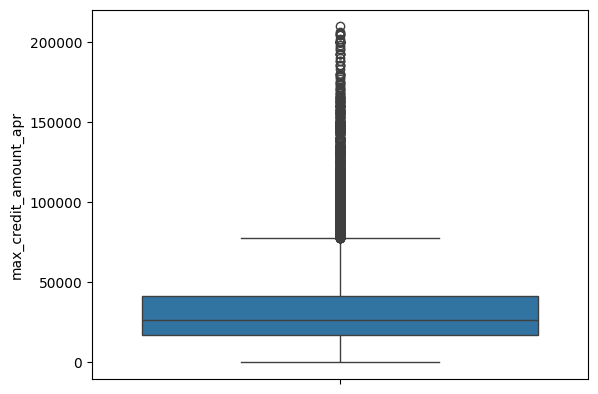

In [37]:
sns.boxplot(dataset["max_credit_amount_apr"])
dataset['z_score_max_credit_amount_apr']=(dataset['max_credit_amount_apr']-dataset['max_credit_amount_apr'].mean())/dataset['max_credit_amount_apr'].std()
dataset['z_score_max_credit_amount_apr']
min(dataset[dataset['z_score_max_credit_amount_apr']>1].max_credit_amount_apr)
dataset=dataset[(dataset['z_score_max_credit_amount_apr']<3) & (dataset['z_score_max_credit_amount_apr']>-2)]
dataset.drop(columns='z_score_max_credit_amount_apr',inplace=True)

In [38]:
dataset['z_score_debit_amount_may']=(dataset['debit_amount_may']-dataset['debit_amount_may'].mean())/dataset['debit_amount_may'].std()
dataset['z_score_debit_amount_may']
min(dataset[dataset['z_score_debit_amount_may']>7].debit_amount_may)
dataset=dataset[dataset['z_score_debit_amount_may']<10]
dataset.drop(columns='z_score_debit_amount_may',inplace=True)



<ipython-input-38-6227c246ad02>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.drop(columns='z_score_debit_amount_may',inplace=True)


In [39]:
dataset['z_score_credit_amount_may']=(dataset['credit_amount_may']-dataset['credit_amount_may'].mean())/dataset['credit_amount_may'].std()
dataset['z_score_credit_amount_may']
min(dataset[dataset['z_score_credit_amount_may']>2].credit_amount_may)
dataset=dataset[dataset['z_score_credit_amount_may']<4]
dataset.drop(columns='z_score_credit_amount_may',inplace=True)



<ipython-input-39-76e6c775bae5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['z_score_credit_amount_may']=(dataset['credit_amount_may']-dataset['credit_amount_may'].mean())/dataset['credit_amount_may'].std()


In [40]:
dataset['z_score_max_credit_amount_may']=(dataset['max_credit_amount_may']-dataset['max_credit_amount_may'].mean())/dataset['max_credit_amount_may'].std()
dataset['z_score_max_credit_amount_may']
min(dataset[dataset['z_score_max_credit_amount_may']>7].max_credit_amount_may)
dataset=dataset[(dataset['z_score_max_credit_amount_may']<2) & (dataset['z_score_max_credit_amount_may']>-2) ]
dataset.drop(columns='z_score_max_credit_amount_may',inplace=True)

In [41]:
dataset['z_score_debit_amount_jun']=(dataset['debit_amount_jun']-dataset['debit_amount_jun'].mean())/dataset['debit_amount_jun'].std()
dataset['z_score_debit_amount_jun']
min(dataset[dataset['z_score_debit_amount_jun']>2].debit_amount_jun)
dataset=dataset[dataset['z_score_debit_amount_jun']<4]
dataset.drop(columns='z_score_debit_amount_jun',inplace=True)

In [42]:
dataset['z_score_credit_amount_jun']=(dataset['credit_amount_jun']-dataset['credit_amount_jun'].mean())/dataset['credit_amount_jun'].std()
dataset['z_score_credit_amount_jun']
min(dataset[dataset['z_score_credit_amount_jun']>4].credit_amount_jun)
dataset=dataset[(dataset['z_score_credit_amount_jun']<5) & (dataset['z_score_credit_amount_jun']>-3)]
dataset.drop(columns='z_score_credit_amount_jun',inplace=True)



In [43]:
dataset['z_score_max_credit_amount_jun']=(dataset['max_credit_amount_jun']-dataset['max_credit_amount_jun'].mean())/dataset['max_credit_amount_jun'].std()
dataset['z_score_max_credit_amount_jun']
min(dataset[dataset['z_score_max_credit_amount_jun']>5].max_credit_amount_jun)
dataset=dataset[(dataset['z_score_max_credit_amount_jun']<2) & (dataset['z_score_max_credit_amount_jun']>-2)]
dataset.drop(columns='z_score_max_credit_amount_jun',inplace=True)

In [44]:
dataset['cc_cons'].describe()

,cc_cons
count,17668.000000
mean,5335.465022
std,8238.333473
min,0.000000
25%,1200.750000
50%,2788.000000
75%,6099.000000
max,150000.000000


In [45]:
dataset['z_score_target']=(dataset['cc_cons']-dataset['cc_cons'].mean())/dataset['cc_cons'].std()

In [46]:
min(dataset[dataset['z_score_target']>3].cc_cons)

30062

In [47]:
min(dataset[dataset['z_score_target']>4].cc_cons)

38333

In [48]:
dataset=dataset[(dataset['z_score_target']<1) & (dataset['z_score_target']>0)]

In [49]:
dataset.drop('z_score_target',axis=1,inplace=True)

<ipython-input-49-993b60e03322>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.drop('z_score_target',axis=1,inplace=True)


In [50]:
min(dataset['cc_cons'])

5336

In [51]:
dataset['cc_cons'].value_counts()

,count
cc_cons,
6000,11
10000,8
8000,6
12999,5
6999,4
...,...
8032,1
8518,1
5766,1


<Axes: ylabel='card_lim'>

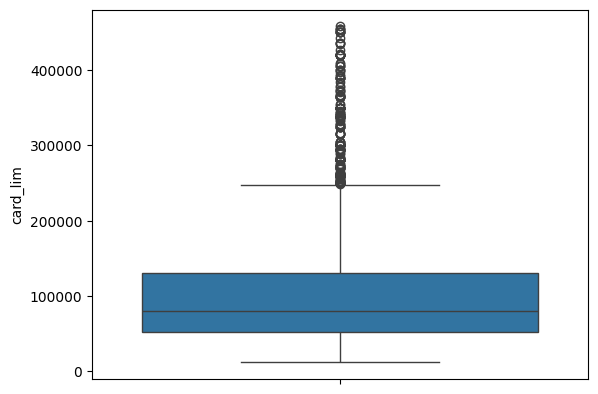

In [52]:
sns.boxplot(dataset["card_lim"])

In [53]:
#dataset['z_score_card']=(dataset['card_lim']-dataset['card_lim'].mean())/dataset['card_lim'].std()

In [54]:
#min(dataset[dataset['z_score_card']>3].card_lim)

In [55]:
dataset[dataset['card_lim']==0.0]

,id,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,...,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons


In [56]:
## Removing 0 value from the target variable

In [57]:
dataset=dataset[dataset['cc_cons']!=0]

In [58]:
dataset=dataset[dataset['card_lim']!=0.0]

### Removing null values from the dataframe

In [59]:
dataset_copy=dataset.copy()

In [60]:
dataset_copy

,id,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,...,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
20,438,saving,M,36,977,4762.00,NaN,5259.00,1119.00,1847.520,...,15.0,25000.0,95111.28,101280.00,11.0,34.0,46162.0,NaN,0.00,7090
41,12484,saving,F,32,233,15461.21,40236.75,33163.00,34018.50,9333.000,...,54.0,67000.0,55207.72,67653.00,2.0,49.0,67000.0,NaN,3738.09,5839
45,31701,current,M,34,245,4254.12,573.00,5723.67,NaN,5341.395,...,18.0,28000.0,120302.01,125022.00,8.0,22.0,42500.0,NaN,0.00,12500
74,29968,current,M,35,623,2527.00,NaN,3204.92,NaN,4107.000,...,28.0,19406.0,42837.59,76673.00,10.0,29.0,59757.0,NaN,0.00,7618
75,41005,current,M,34,523,5884.80,6017.00,3712.74,7201.40,6249.420,...,23.0,40000.0,50697.33,58669.50,7.0,17.0,34800.0,NaN,0.00,6869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32786,42297,current,M,35,324,5588.00,604.78,424.00,549.29,20909.000,...,11.0,8213.0,19045.09,19690.50,9.0,19.0,8845.0,NaN,156.86,11049
32790,39053,saving,M,41,244,17968.60,NaN,24081.40,NaN,711.000,...,4.0,35000.0,114588.93,120377.00,4.0,8.0,57000.0,NaN,12822.26,9599
32793,26103,current,M,31,683,3054.50,15049.00,2753.00,6705.00,3051.750,...,22.0,28361.0,57998.38,62816.75,9.0,26.0,28350.0,NaN,10433.97,5769
32796,24535,current,M,30,683,2835.00,1855.00,3441.00,1084.00,6117.000,...,10.0,10642.0,39208.30,51827.00,4.0,11.0,26100.0,NaN,0.00,8480


In [61]:
dataset_copy.isnull().sum()

,0
id,0
account_type,0
gender,0
age,0
region_code,0
cc_cons_apr,0
dc_cons_apr,1856
cc_cons_may,0
dc_cons_may,1698
cc_cons_jun,0


#### For personal_loan_active,personal_loan_closed,vehicle_loanactive/closed, investment_1/2/3/4 columns replace NaN with 0

In [62]:
df = pd.DataFrame(dataset_copy)
df['personal_loan_active'] = df['personal_loan_active'].fillna(0)
df['personal_loan_closed'] = df['personal_loan_closed'].fillna(0)
df['vehicle_loan_active'] = df['vehicle_loan_active'].fillna(0)
df['vehicle_loan_closed'] = df['vehicle_loan_closed'].fillna(0)
df['investment_1'] = df['investment_1'].fillna(0)
df['investment_2'] = df['investment_2'].fillna(0)
df['investment_3'] = df['investment_3'].fillna(0)
df['investment_4'] = df['investment_4'].fillna(0)

#### Combining investment_1,2,3,4

In [64]:
df['investment']=df['investment_1']+df['investment_2']+df['investment_3']+df['investment_4']

In [65]:
df=df.drop(columns=['investment_1','investment_2','investment_3','investment_4','dc_cons_may'],axis=1)

#### Replacing nan values with average value of that column

In [66]:
null_value_columns=['dc_cons_apr','cc_count_apr','cc_count_may','cc_count_jun','dc_count_apr','dc_count_jun','debit_amount_apr','credit_count_apr','credit_amount_may','credit_count_may','credit_amount_jun','credit_amount_apr','max_credit_amount_apr','debit_amount_may','max_credit_amount_may','debit_amount_jun','max_credit_amount_jun' ]

In [67]:
for i in null_value_columns:
   df[i].fillna(df[i].mean(),inplace=True)

#### If Loan_enq exists, its value is Y, otherwise, it is NaN. Convert Y to 1 and NaN to 0.

In [68]:
df['loan_enq']

,loan_enq
20,NaN
41,NaN
45,NaN
74,NaN
75,NaN
...,...
32786,NaN
32790,NaN
32793,NaN
32796,NaN


In [69]:
df['loan_enq']=df['loan_enq'].replace({"Y":1})
df['loan_enq']=df['loan_enq'].fillna(0)
df['loan_enq']=df['loan_enq'].astype(float, errors = 'raise')

In [70]:
dataset_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3544 entries, 20 to 32811
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3544 non-null   int64  
 1   account_type           3544 non-null   object 
 2   gender                 3544 non-null   object 
 3   age                    3544 non-null   int64  
 4   region_code            3544 non-null   int64  
 5   cc_cons_apr            3544 non-null   float64
 6   dc_cons_apr            1688 non-null   float64
 7   cc_cons_may            3544 non-null   float64
 8   dc_cons_may            1846 non-null   float64
 9   cc_cons_jun            3544 non-null   float64
 10  dc_cons_jun            1399 non-null   float64
 11  cc_count_apr           3544 non-null   float64
 12  cc_count_may           3544 non-null   float64
 13  cc_count_jun           3544 non-null   float64
 14  dc_count_apr           1688 non-null   float64
 15  dc_coun

In [71]:
df['gender'].value_counts()

,count
gender,
M,2946
F,598


In [72]:
df['account_type'].value_counts()

,count
account_type,
current,2822
saving,722


### Converting categorical values

In [73]:
## Account_type and gender are of Dtype object
len(df.account_type.unique())

2

In [74]:
len(df.gender.unique())

2

In [75]:
df.dropna(inplace=True)

In [76]:
dataset_copy=df.copy()

In [77]:
dataset_copy

,id,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,cc_cons_jun,dc_cons_jun,...,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons,investment
41,12484,saving,F,32,233,15461.21,40236.75,33163.00,9333.00,26180.00,...,67000.0,55207.72,67653.00,2.0,49.0,67000.0,0.0,3738.09,5839,16203.0
208,44693,current,F,29,523,33889.81,1536.00,13016.31,19194.48,1428.00,...,25599.0,51215.95,39480.00,9.0,18.0,25587.0,0.0,2256.50,6972,0.0
223,19078,current,M,56,683,22447.85,4625.00,6494.00,9331.00,2932.28,...,76304.0,98543.42,83964.76,5.0,32.0,76292.0,0.0,265.08,10819,0.0
253,32700,current,M,30,534,2375.00,5418.11,11101.00,8140.00,3867.25,...,49900.0,61683.75,33032.25,11.0,24.0,10000.0,0.0,14605.95,5427,0.0
342,28834,current,F,35,683,7681.31,10171.25,9268.49,2640.00,3513.00,...,30904.0,41105.08,29423.00,2.0,38.0,29238.0,0.0,7706.84,5520,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32711,42759,current,M,31,266,2225.00,2466.00,6554.20,2101.57,4958.00,...,35565.0,147493.75,39579.00,2.0,8.0,37946.0,0.0,5754.51,6456,0.0
32780,36842,saving,M,37,759,17517.61,7433.00,10366.27,12435.27,4919.00,...,35000.0,40845.65,47797.86,7.0,13.0,42000.0,0.0,4076.93,5616,0.0
32781,431,current,M,30,683,19771.00,3827.00,54355.27,1417.56,136.00,...,75358.0,78921.57,74188.00,2.0,31.0,74034.0,0.0,0.00,5502,0.0
32786,42297,current,M,35,324,5588.00,604.78,424.00,20909.00,1623.00,...,8213.0,19045.09,19690.50,9.0,19.0,8845.0,0.0,156.86,11049,0.0


In [78]:
dataset_copy=pd.get_dummies(dataset_copy,columns=['account_type','gender'])
print(dataset_copy.head())

        id  age  region_code  cc_cons_apr  dc_cons_apr  cc_cons_may  \
41   12484   32          233     15461.21     40236.75     33163.00   
208  44693   29          523     33889.81      1536.00     13016.31   
223  19078   56          683     22447.85      4625.00      6494.00   
253  32700   30          534      2375.00      5418.11     11101.00   
342  28834   35          683      7681.31     10171.25      9268.49   

     cc_cons_jun  dc_cons_jun  cc_count_apr  cc_count_may  ...  \
41       9333.00     26180.00           3.0           1.0  ...   
208     19194.48      1428.00          22.0          17.0  ...   
223      9331.00      2932.28           4.0           3.0  ...   
253      8140.00      3867.25           1.0           5.0  ...   
342      2640.00      3513.00           6.0          16.0  ...   

     debit_count_jun  max_credit_amount_jun  loan_enq  emi_active  cc_cons  \
41              49.0                67000.0       0.0     3738.09     5839   
208             18.0

### Checking correlation of the columns with target feature

<Axes: >

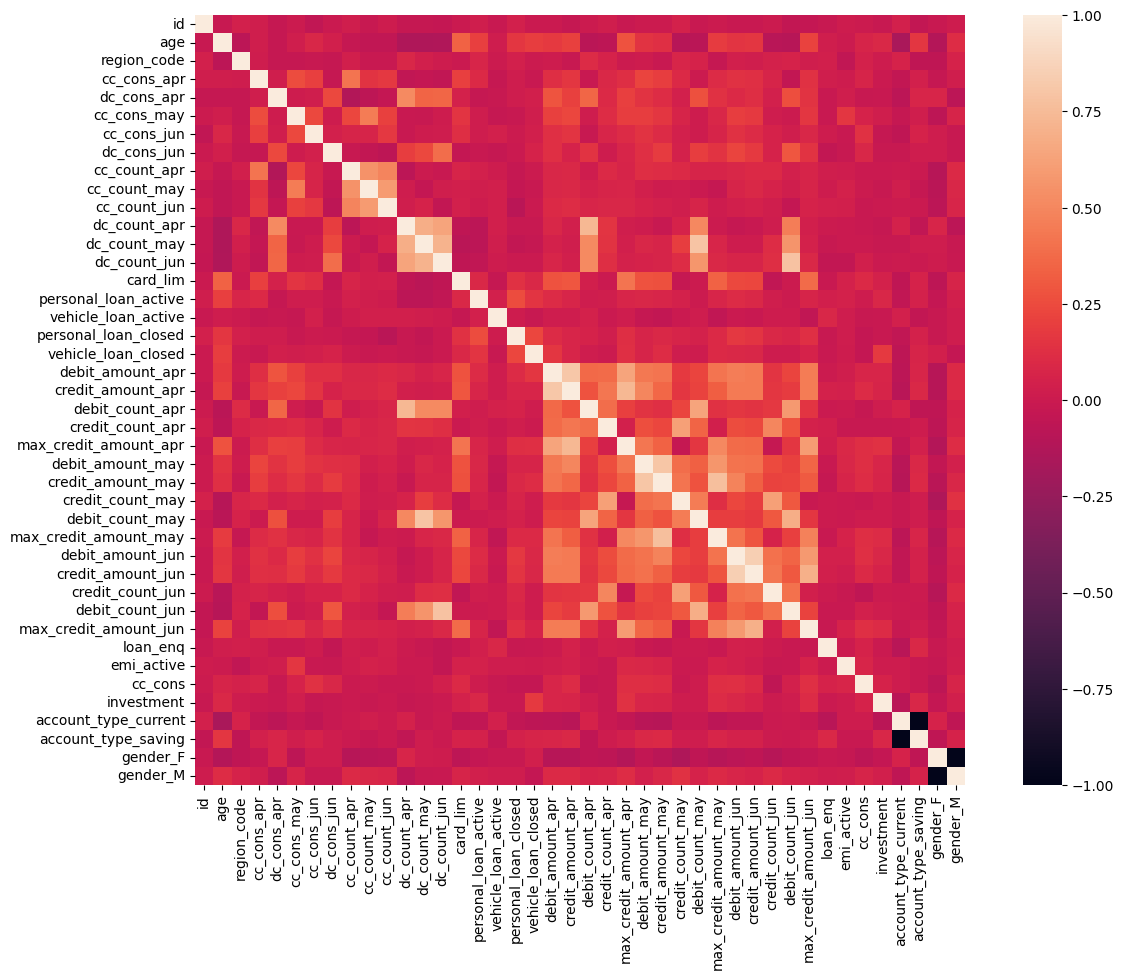

In [80]:

features=list(dataset_copy.columns)
correlation= dataset_copy[features].corr()
fig = plt.figure(figsize=(15,10))
sns.heatmap(correlation,vmax=1,square = True)

### Removing features with absolute correlation>0.1 with target variable

In [81]:
ind_list=abs(correlation['cc_cons'][abs(correlation['cc_cons'])>0.1].drop('cc_cons')).index.tolist()
ind_list

['cc_cons_jun',
 'credit_amount_apr',
 'max_credit_amount_apr',
 'debit_amount_may',
 'credit_amount_may',
 'max_credit_amount_may',
 'debit_amount_jun',
 'max_credit_amount_jun']

<Axes: >

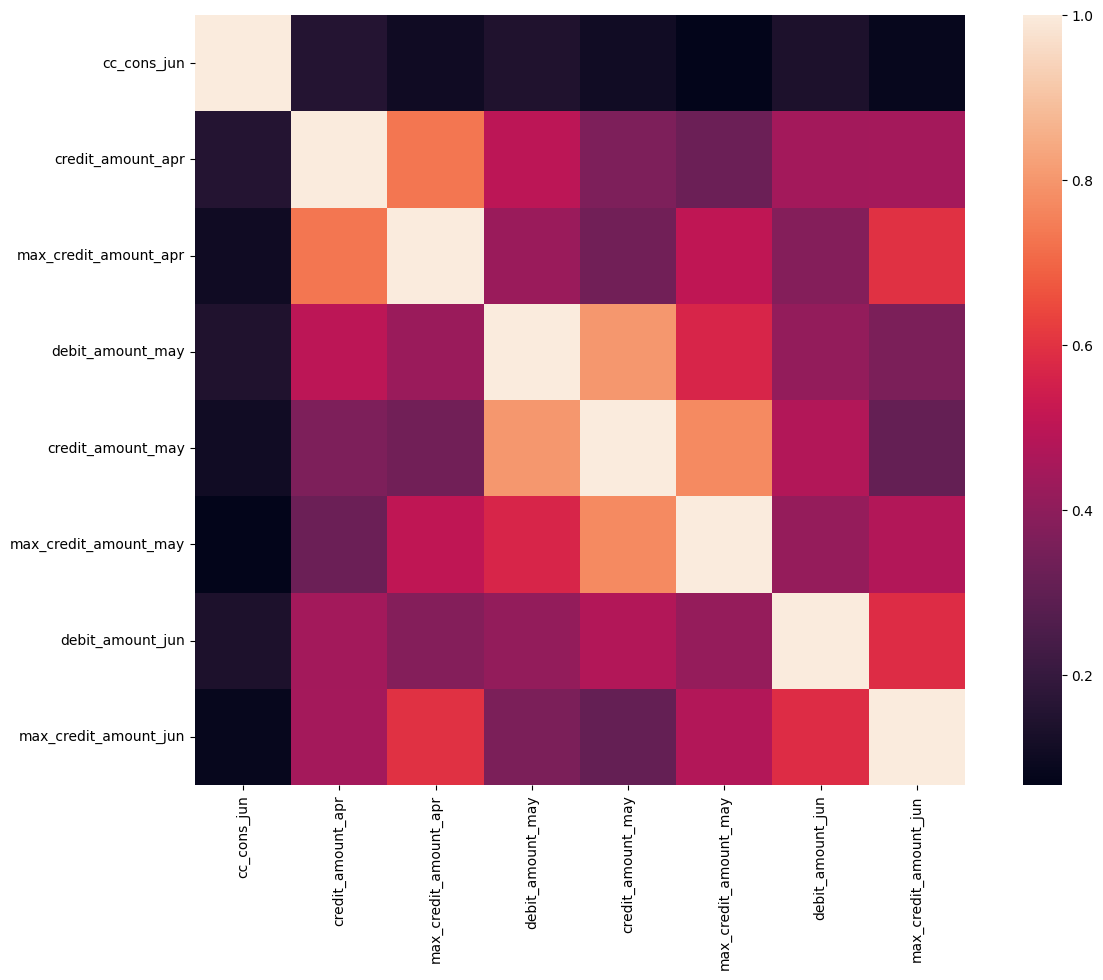

In [82]:
features=list(dataset_copy.columns)
features.remove('cc_cons')
correlation= dataset_copy[ind_list].corr()
fig = plt.figure(figsize=(15,10))
sns.heatmap(correlation,vmax=1,square = True)

In [83]:
ind_list

['cc_cons_jun',
 'credit_amount_apr',
 'max_credit_amount_apr',
 'debit_amount_may',
 'credit_amount_may',
 'max_credit_amount_may',
 'debit_amount_jun',
 'max_credit_amount_jun']

In [84]:
ind_list.append('cc_cons')

In [85]:
dataset_copy=dataset_copy[ind_list]

In [86]:
dataset_copy.dropna(inplace=True)

<ipython-input-86-6c9b44a822a8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_copy.dropna(inplace=True)


In [87]:
dataset_copy.describe()

,cc_cons_jun,credit_amount_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,max_credit_amount_may,debit_amount_jun,max_credit_amount_jun,cc_cons
count,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000
mean,7458.903273,58824.480275,36448.784424,54848.382313,61390.509662,37629.266304,65490.989124,36182.877571,8200.630412
std,7361.436453,36266.491127,18620.383661,41361.585690,43406.620350,21282.510814,43054.738629,18639.290463,2187.504227
min,184.000000,112.880000,25.880000,1719.000000,92.260000,11.500000,1467.000000,55.000000,5342.000000
25%,2199.500000,32846.260000,22899.000000,27230.625000,30507.500000,22964.000000,34959.590000,23267.000000,6332.500000
50%,5157.000000,49442.500000,32522.000000,44379.440000,49958.000000,33447.000000,54511.660000,32575.000000,7669.000000
75%,10241.485000,76161.705000,46305.000000,69574.660000,79418.250000,49000.000000,86369.055000,45996.000000,9752.000000
max,42682.200000,218471.140000,106400.000000,356575.730000,308106.010000,110500.000000,300716.950000,97062.000000,13561.000000



### Applying Normalization to all the columns except the target variable

In [89]:
#ind_list.append('cc_cons')
dataset_copy=dataset_copy[ind_list]
#ind_list.remove('cc_cons')
#X=dataset_copy[ind_list]

In [90]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
dataset_normalized = scaler.fit_transform(dataset_copy)

In [91]:
dataset_copy.describe()

,cc_cons_jun,credit_amount_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,max_credit_amount_may,debit_amount_jun,max_credit_amount_jun,cc_cons
count,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000
mean,7458.903273,58824.480275,36448.784424,54848.382313,61390.509662,37629.266304,65490.989124,36182.877571,8200.630412
std,7361.436453,36266.491127,18620.383661,41361.585690,43406.620350,21282.510814,43054.738629,18639.290463,2187.504227
min,184.000000,112.880000,25.880000,1719.000000,92.260000,11.500000,1467.000000,55.000000,5342.000000
25%,2199.500000,32846.260000,22899.000000,27230.625000,30507.500000,22964.000000,34959.590000,23267.000000,6332.500000
50%,5157.000000,49442.500000,32522.000000,44379.440000,49958.000000,33447.000000,54511.660000,32575.000000,7669.000000
75%,10241.485000,76161.705000,46305.000000,69574.660000,79418.250000,49000.000000,86369.055000,45996.000000,9752.000000
max,42682.200000,218471.140000,106400.000000,356575.730000,308106.010000,110500.000000,300716.950000,97062.000000,13561.000000


In [92]:
dataset_copy

,cc_cons_jun,credit_amount_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,max_credit_amount_may,debit_amount_jun,max_credit_amount_jun,cc_cons
41,9333.00,59081.52,59000.0,86753.13,103799.00,67000.0,55207.72,67000.0,5839
208,19194.48,43299.00,25599.0,42034.07,51084.00,25599.0,51215.95,25587.0,6972
223,9331.00,111141.71,76304.0,119788.79,127334.65,76304.0,98543.42,76292.0,10819
253,8140.00,71664.50,33000.0,46695.70,70756.50,49900.0,61683.75,10000.0,5427
342,2640.00,29487.00,29239.0,35758.00,47762.00,30904.0,41105.08,29238.0,5520
...,...,...,...,...,...,...,...,...,...
32711,2101.57,35724.00,35565.0,38563.00,45599.00,35565.0,147493.75,37946.0,6456
32780,12435.27,68617.00,30000.0,39088.75,35165.70,35000.0,40845.65,42000.0,5616
32781,1417.56,72570.97,71387.0,71576.44,75556.00,75358.0,78921.57,74034.0,5502
32786,20909.00,24627.00,17190.0,18784.86,19353.00,8213.0,19045.09,8845.0,11049


In [93]:
X=dataset_copy
y=dataset_copy['cc_cons']

In [96]:
from collections.abc import Sequence
def to_xy(df, target):
    result = []
    for x in df.columns:
        if x != target:
            result.append(x)
    # find out the type of the target column.
    target_type = df[target].dtypes
    target_type = target_type[0] if isinstance(target_type, Sequence) else target_type
    # Encode to int for classification, float otherwise. TensorFlow likes 32 bits.
    if target_type in (np.int64, np.int32):
        # Classification
        dummies = pd.get_dummies(df[target])
        return df[result].values.astype(np.float32), dummies.values.astype(np.float32)
    else:
        # Regression
        return df[result].values.astype(np.float32), df[target].values.astype(np.float32)

In [97]:
X,y=to_xy(dataset_copy,"cc_cons")

In [98]:
X.shape

(947, 9)

In [99]:
y.shape

(947,)

## Split the dataset

In [102]:
from sklearn.model_selection import train_test_split

In [103]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.25, random_state=11)

In [104]:
def encode_numeric_zscore(df, name, mean=None, sd=None):
    if mean is None:
        mean = df[name].mean()

    if sd is None:
        sd = df[name].std()

    df[name] = (df[name] - mean) / sd

In [105]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_norm = scaler.fit_transform(X_train)

In [106]:
X_norm=scaler.fit_transform(X)

In [107]:
X_train_norm

array([[0.15959825, 0.25321744, 0.29158521, ..., 0.29210113, 0.50970549,
        0.70543862],
       [0.08804731, 0.29325408, 0.46979585, ..., 0.18957397, 0.56640242,
        0.52974814],
       [0.20196733, 0.10289109, 0.16405419, ..., 0.13399585, 0.35340749,
        0.4554082 ],
       ...,
       [0.05148938, 0.18246216, 0.22115454, ..., 0.1755217 , 0.25758966,
        0.02372551],
       [0.2155353 , 0.71064488, 0.58037726, ..., 0.44274621, 0.58987496,
        0.8045991 ],
       [0.93488758, 0.37885501, 0.44120807, ..., 0.27095844, 0.48350119,
        0.68305147]])

In [108]:
X_test_norm=scaler.transform(X_test)

In [109]:
X_test_norm

array([[0.20560871, 0.33125433, 0.51029442, ..., 0.13485787, 0.37706557,
        0.70397859],
       [0.11748733, 0.08964222, 0.18356081, ..., 0.0967389 , 0.38698238,
        0.13359289],
       [0.00865919, 0.19352197, 0.27069667, ..., 0.0927549 , 0.2965353 ,
        0.27947439],
       ...,
       [0.04028406, 0.13759095, 0.26121128, ..., 0.12367925, 0.28613399,
        0.0475727 ],
       [0.64655091, 0.10000725, 0.17324815, ..., 0.11474989, 0.24032286,
        0.01739871],
       [0.26542983, 0.27147601, 0.3864015 , ..., 0.30743103, 0.42341274,
        0.11193576]])

In [110]:
X_train=X_train_norm
X_test=X_test_norm

In [111]:
X_train

array([[0.15959825, 0.25321744, 0.29158521, ..., 0.29210113, 0.50970549,
        0.70543862],
       [0.08804731, 0.29325408, 0.46979585, ..., 0.18957397, 0.56640242,
        0.52974814],
       [0.20196733, 0.10289109, 0.16405419, ..., 0.13399585, 0.35340749,
        0.4554082 ],
       ...,
       [0.05148938, 0.18246216, 0.22115454, ..., 0.1755217 , 0.25758966,
        0.02372551],
       [0.2155353 , 0.71064488, 0.58037726, ..., 0.44274621, 0.58987496,
        0.8045991 ],
       [0.93488758, 0.37885501, 0.44120807, ..., 0.27095844, 0.48350119,
        0.68305147]])

## Fully Connected Neural Network

In [112]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras import regularizers


checkpoint_path = 'fnn.hdf5'

In [114]:
!pip install scikeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 55.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2


In [115]:
from tensorflow import keras
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [116]:

## Hyper parameter tuning
def create_model(layers, activation):
    model = Sequential()
    print(layers)
    for i in range(len(layers)):
        if i==0:
            model.add(Dense(layers[i],input_dim=X_train.shape[1],activation=activation))
        else:
            model.add(Dense(layers[i],activation=activation))
        if i==len(layers)-1:
            model.add(Dense(1))

    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

model = KerasClassifier(build_fn=create_model, verbose=0)

In [117]:
model = Sequential()

#Tuning Hyperparameters to achieve best model and to improve performance
model.add(Dense(200, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(150,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(75,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(50,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(24,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(14,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(7,activation='relu'))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [118]:
layers_list= [[200,150,100,50,1]]
activation_func = ['relu']
batchs=[10,64]
epoch=[500,1000]
param_grid = dict(layers=layers_list, activation=activation_func, batch_size = batchs, epochs=epoch)

grid = GridSearchCV(estimator=model, param_grid=param_grid,verbose=0,n_jobs=-1,cv=3)

In [119]:
from tensorflow.keras.callbacks import EarlyStopping
#stopper = EarlyStopping(monitor='val_acc', patience=3, verbose=1)
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-5,patience=10, verbose=0, mode='auto')
fit_params = dict(callbacks=[monitor])

In [123]:
best_activation='relu'
best_batch=32
best_epoch=500
best_layers=[200,150,75,50,20,5,1]

In [124]:
model_fnn=Sequential()
flag=0
for i in range(len(best_layers)):
    if best_layers[i]==1:
        model_fnn.add(Dense(1))
    if flag==1:
        model_fnn.add(Dense(best_layers[i], input_dim=X_train.shape[1], activation=best_activation))
    else:
        model_fnn.add(Dense(best_layers[i],activation=best_activation))
        model_fnn.add(Dropout(0.3))
    flag+=1

In [125]:
model_fnn.compile(loss='mean_squared_error', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-5,patience=10, verbose=2, mode='auto')

model_checkpoint = ModelCheckpoint(filepath=checkpoint_path + ".keras", monitor='val_loss',verbose=2,save_best_only=True,save_weights_only=False, mode='auto')

model_fnn.fit(X_train, y_train, validation_data=(X_test,y_test), batch_size=best_batch,callbacks=[monitor, model_checkpoint], verbose=2, epochs=best_epoch)
model_fnn.summary()

Epoch 1/500

Epoch 1: val_loss improved from inf to 68859992.00000, saving model to fnn.hdf5.keras
23/23 - 9s - 379ms/step - loss: 73081968.0000 - val_loss: 68859992.0000
Epoch 2/500

Epoch 2: val_loss improved from 68859992.00000 to 68560808.00000, saving model to fnn.hdf5.keras
23/23 - 0s - 20ms/step - loss: 73004824.0000 - val_loss: 68560808.0000
Epoch 3/500

Epoch 3: val_loss improved from 68560808.00000 to 63683744.00000, saving model to fnn.hdf5.keras
23/23 - 0s - 16ms/step - loss: 71425856.0000 - val_loss: 63683744.0000
Epoch 4/500

Epoch 4: val_loss improved from 63683744.00000 to 27910272.00000, saving model to fnn.hdf5.keras
23/23 - 0s - 17ms/step - loss: 56978064.0000 - val_loss: 27910272.0000
Epoch 5/500

Epoch 5: val_loss improved from 27910272.00000 to 26658720.00000, saving model to fnn.hdf5.keras
23/23 - 1s - 22ms/step - loss: 43483188.0000 - val_loss: 26658720.0000
Epoch 6/500

Epoch 6: val_loss improved from 26658720.00000 to 20773726.00000, saving model to fnn.hdf5.k

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 200)                 │           2,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 150)                 │          30,150 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 75)                  │          11,325 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 75)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 50)                  │           3,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 20)                  │           1,020 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 5)                   │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 5)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │               2 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 145,226 (567.29 KB)

 Trainable params: 48,408 (189.09 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 96,818 (378.20 KB)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
RMSE:4287.699485444125


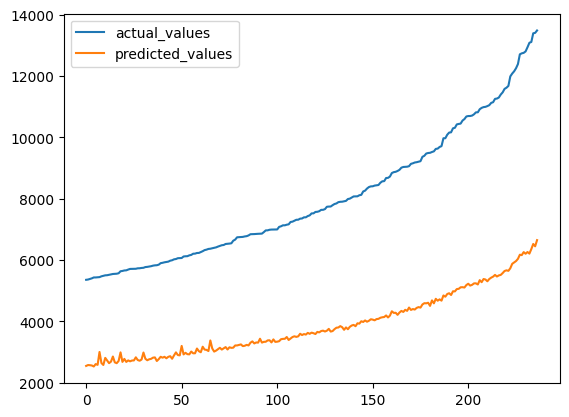

In [126]:
from sklearn.metrics import mean_squared_error as mse
y_pred=model_fnn.predict(X_test)
rmse_fnn=np.sqrt(mse(y_test,y_pred))
print(f"RMSE:{rmse_fnn}")
import matplotlib.pyplot as plt
def reg_chart_increasing_order(actual,predicted):
    df_chart=pd.DataFrame({'prediction':predicted.flatten(),'actual':actual.values.flatten()})
    df_chart.sort_values(by=['actual'],inplace=True)
    i = plt.plot(list(df_chart['actual']),label='actual_values')
    j = plt.plot(list(df_chart['prediction']),label='predicted_values')
    plt.legend()
    plt.show()


reg_chart_increasing_order(y_test,y_pred)